In [23]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (12,9)

pd.set_option('display.max_columns', None)

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.drop('id', axis=1, inplace=True)

In [4]:
train_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [5]:
categ_vars = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
for i in categ_vars:
    one_hot_encoded = pd.get_dummies(train_df[i], prefix=i)
    train_df = pd.concat([train_df, one_hot_encoded], axis=1)
    train_df.drop(i, axis=1, inplace=True)

label_encoder = LabelEncoder()
train_df['NObeyesdad_encoded'] = label_encoder.fit_transform(train_df['NObeyesdad'])

In [6]:
train_df['IMC'] = train_df['Weight'] / (train_df['Height'] * 2)
train_df.drop(['Height', 'Weight'], axis=1, inplace=True)

In [7]:
X = train_df.drop(['NObeyesdad', 'NObeyesdad_encoded'], axis=1)
y = train_df['NObeyesdad_encoded']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)

In [10]:
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [11]:
y_pred = xgb_classifier.predict(X_test)

In [12]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Mean Squared Error: 0.898121387283237
Accuracy: 0.8933044315992292

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       524
           1       0.86      0.87      0.86       626
           2       0.89      0.86      0.87       543
           3       0.97      0.97      0.97       657
           4       1.00      1.00      1.00       804
           5       0.77      0.75      0.76       484
           6       0.76      0.81      0.79       514

    accuracy                           0.89      4152
   macro avg       0.88      0.88      0.88      4152
weighted avg       0.89      0.89      0.89      4152


Confusion Matrix:
 [[484  36   0   0   0   3   1]
 [ 34 543   0   0   0  44   5]
 [  2   1 466  14   1  12  47]
 [  0   0  13 638   3   0   3]
 [  0   0   0   1 802   1   0]
 [  1  39  11   0   0 361  72]
 [  0  12  36   5   0  46 415]]


In [13]:
param_dist = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300, 400],
}

In [14]:
random_search = RandomizedSearchCV(estimator=xgb.XGBClassifier(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=10,
                                   scoring='accuracy',
                                   cv=5,
                                   n_jobs=-1,
                                   random_state=42)

In [15]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': [3, 5, 7, 9],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=42, scoring='accuracy')

In [16]:
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Best Score: 0.8919071908626638


In [17]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8913776493256262


## SelectKBest

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

gbc = GradientBoostingClassifier(max_depth=5, random_state=42)

gbc.fit(X=X_train, y=y_train)

preds = gbc.predict(X=X_test)

f1_score_all = f1_score(y_test, preds, average='weighted')

print(f1_score_all)

0.8924070600998775


In [35]:
X_train

,Age,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,IMC
9958,17.000000,3.000000,3.000000,2.000000,3.000000,1.000000,False,True,False,True,False,True,True,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,27.401130
7841,22.667596,2.000000,4.000000,2.000000,2.000000,1.000000,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True,False,False,False,True,False,15.648869
9293,21.838323,3.000000,2.880817,1.645338,0.739881,0.000000,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,False,33.525789
15209,41.000000,2.000000,3.000000,1.000000,0.000000,0.000000,True,False,False,True,False,True,False,False,True,False,True,False,True,False,False,True,False,True,False,False,False,False,25.316456
16515,23.000000,3.000000,3.000000,3.000000,2.000000,1.000000,False,True,False,True,True,False,False,False,True,False,True,False,True,False,True,False,False,False,False,False,True,False,26.388889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,18.000000,2.628791,2.562895,1.844645,0.288032,0.722276,True,False,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True,False,False,False,True,False,23.351117
11964,22.000000,3.000000,3.000000,2.000000,3.000000,0.000000,False,True,False,True,True,False,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,False,27.142857
5390,21.000000,2.000000,3.000000,3.000000,2.000000,0.000000,False,True,True,False,False,True,True,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,20.987654
860,26.000000,3.000000,3.000000,2.770732,0.000000,0.237307,True,False,False,True,False,True,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,False,33.918543


In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

f1_score_list = []

for k in range(1,29):
    selector = SelectKBest(mutual_info_classif, k=k)
    selector.fit(X_train, y_train)

    sel_X_train_v2 = selector.transform(X_train)
    sel_X_test_v2 = selector.transform(X_test)

    gbc.fit(sel_X_train_v2, y_train)
    kbest_preds = gbc.predict(sel_X_test_v2)

    f1_score_kbest = round(f1_score(y_test, kbest_preds, average='weighted'), 3)

    f1_score_list.append(f1_score_kbest)

KeyboardInterrupt: 

In [ ]:
f1_score_list

[0.737,
 0.84,
 0.848,
 0.856,
 0.865,
 0.861,
 0.876,
 0.876,
 0.878,
 0.873,
 0.879,
 0.879,
 0.879]

In [39]:
f1_score_list = []

for k in range(15,20):
    selector = SelectKBest(mutual_info_classif, k=k)
    selector.fit(X_train, y_train)

    sel_X_train_v2 = selector.transform(X_train)
    sel_X_test_v2 = selector.transform(X_test)

    gbc.fit(sel_X_train_v2, y_train)
    kbest_preds = gbc.predict(sel_X_test_v2)

    f1_score_kbest = round(f1_score(y_test, kbest_preds, average='weighted'), 3)

    f1_score_list.append(f1_score_kbest)

In [38]:
f1_score_list

[0.737, 0.84, 0.848, 0.856]

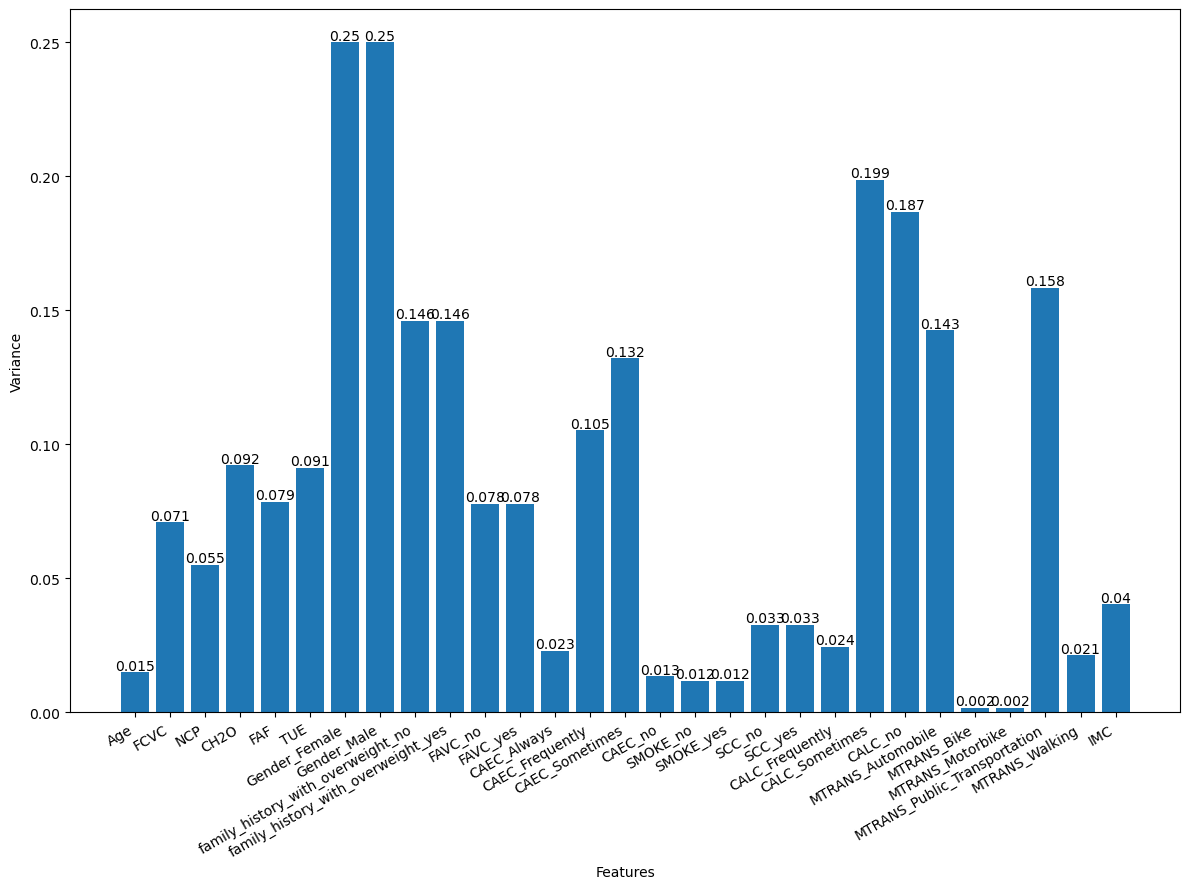

In [25]:
fig, ax = plt.subplots()

x = X.columns
y = scaled_X_train_v1.var(axis=0)

ax.bar(x,y)
ax.set_xlabel('Features')
ax.set_ylabel('Variance')
# ax.set_ylim(0,0.1)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.001, s=str(round(value,3)), ha='center')

fig.autofmt_xdate()
plt.tight_layout()